In [1]:
import numpy as np
import math
import os.path
from os import path
from icecube.tableio import I3TableWriter
from icecube.hdfwriter import I3HDFTableService, I3HDFWriter
import tables
import h5py
import numpy as np
import math
import os.path
from os import path
from icecube.tableio import I3TableWriter
from icecube.hdfwriter import I3HDFTableService, I3HDFWriter
import tables
import glob
import h5py
import pandas as pd
from icecube.dataclasses import I3Double, I3Particle, I3Direction, I3Position, I3VectorI3Particle, I3Constants, I3VectorOMKey
import pylab
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, CubicSpline, pchip_interpolate, interpn
import scipy.special as sp
from scipy import integrate
from random import seed
import random
# seed(1234)
from photospline import glam_fit, ndsparse, bspline
from mpl_toolkits import mplot3d
mult_bins=np.logspace(0,5,20+1)

depth_space = np.linspace(1.5,2.5,26)
low_angles= np.linspace(0,0.5,13)
high_angles=np.linspace(0.5,1,13)
new_low_angles=np.delete(low_angles,0) 
angles_space=np.concatenate( (new_low_angles,high_angles) )
E_nu_bins=np.logspace(2,7,10+1)
nu_bin_centers = np.sqrt(E_nu_bins[:-1] * E_nu_bins[1:])
E_mu_bins=np.logspace(1,7,10+1)
print(E_nu_bins)
mu_bin_centers = np.sqrt(E_mu_bins[:-1] * E_mu_bins[1:])
# Zen_0.17_Depth_1.5
    # filename='/data/user/vbasu/SelfVetoArrays/DoubleSpline_Zen_0.17_Depth_1.5.npy'
    # # filename='/data/user/vbasu/SelfVetoArrays/NuMu_Mult_Zen_0.04_Depth_2.22.npy'
    # if os.path.exists(filename):#Spline exists
    #     Hist=np.load(filename,allow_pickle=True)
    # print(Hist)
    # print(np.shape(Hist))
for test_index in range(len(E_nu_bins)):
    test_nu_energy=E_nu_bins[test_index]
    print()
    print(np.digitize(test_nu_energy,E_nu_bins)-1)
    try:
        Hist2D=np.load('/data/user/vbasu/SelfVetoArrays/NuMu_EnergyTotal_Zen_0.29_Depth_2.22.npy',allow_pickle=True)
        Hist2D_splined=np.load('/data/user/vbasu/SelfVetoArrays/NuMu_EnergyTotalSplined_Zen_0.29_Depth_2.22.npy',allow_pickle=True)
        
#         print('Single Hist shape',str(np.shape(Hist2D)))
        print(Hist2D_splined[test_index])
        print()
#         popt=Hist2D[test_index][:-1]
#         # logE=np.random.normal(loc=popt[0],scale=popt[1],size=10)
#         # e_index=np.where(np.logical_and(logE>1,logE<7))[0][0]
#         # 10**logE[e_index]
#         for i in range(10):
#             logE=np.random.normal(loc=popt[1],scale=popt[2])
#             inj_muon_energies=[10**logE]
#             print(np.c_[inj_muon_energies,logE])
    except Exception as e:
        print(e)
        


[1.00000000e+02 3.16227766e+02 1.00000000e+03 3.16227766e+03
 1.00000000e+04 3.16227766e+04 1.00000000e+05 3.16227766e+05
 1.00000000e+06 3.16227766e+06 1.00000000e+07]

0
[0.0e+000 0.0e+000 0.0e+000 0.0e+000 0.0e+000 0.0e+000 0.0e+000 0.0e+000
      nan      nan 4.4e-323]


1
[1.71609663e-002 1.90607726e-002 2.02358206e-002 1.73998598e-002
 6.84065265e-003 9.63773914e-003 0.00000000e+000 0.00000000e+000
             nan             nan 2.06845365e-316]


2
[3.71013242e-002 4.09136802e-002 4.39982517e-002 3.57254926e-002
 1.57646533e-002 1.45230805e-002 0.00000000e+000 0.00000000e+000
             nan             nan 1.58101007e-322]


3
[6.24197542e-002 6.76817458e-002 7.32163115e-002 6.00392327e-002
 3.02366775e-002 1.77559965e-002 0.00000000e+000 0.00000000e+000
             nan             nan 4.94065646e-323]


4
[1.18213926e-001 1.22302373e-001 1.33349600e-001 1.18285581e-001
 7.61475011e-002 1.16251689e-002 0.00000000e+000 0.00000000e+000
             nan             nan 1.77863

No handles with labels found to put in legend.


(11,)
(11,)


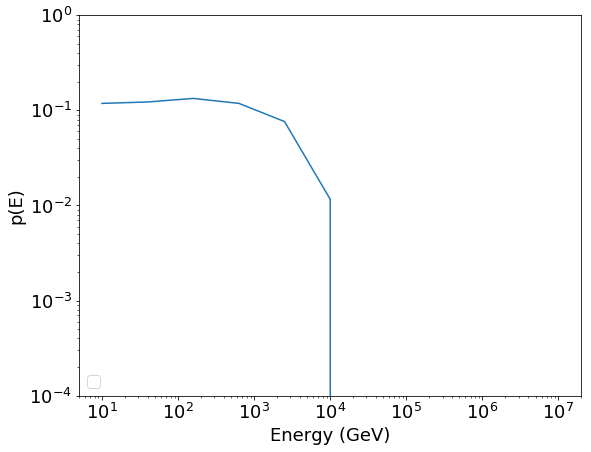

No handles with labels found to put in legend.


[6.51248885e-01 2.41850900e+00 6.94949373e-01 3.11765956e-01
 7.65993468e-02 6.53354651e-03 4.08134078e-04 1.13944251e-05
 0.00000000e+00 0.00000000e+00]


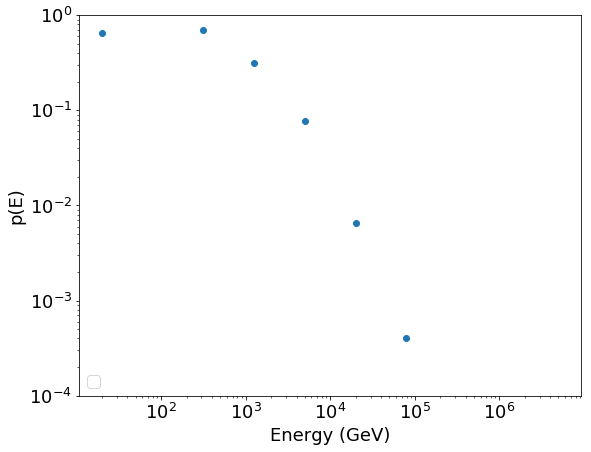

In [2]:
test_index=4
plt.figure(figsize=(9,7))
SMALL_SIZE = 15
MEDIUM_SIZE = 16
BIGGER_SIZE = 18
E_nu_bins=np.logspace(2,7,10+1)
nu_bin_centers = np.sqrt(E_nu_bins[:-1] * E_nu_bins[1:])
E_mu_bins=np.logspace(1,7,10+1)
mu_bin_centers = np.sqrt(E_mu_bins[:-1] * E_mu_bins[1:])
test_nu_energy=E_nu_bins[test_index]
Hist2D_splined=np.load('/data/user/vbasu/SelfVetoArrays/NuMu_EnergyTotalSplined_Zen_0.29_Depth_2.22.npy',allow_pickle=True)
print(np.shape(Hist2D_splined[test_index]))
print(np.shape(E_mu_bins))
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
cm = plt.get_cmap('plasma')# choose something without yellow
plt.plot(E_mu_bins,Hist2D_splined[test_index])
plt.ylabel('p(E)') 
plt.xlabel('Energy (GeV)')
plt.yscale('log')
plt.xscale('log')
plt.legend(loc=3)
plt.ylim(1e-4,1)
plt.show()
plt.figure(figsize=(9,7))
SMALL_SIZE = 15
MEDIUM_SIZE = 16
BIGGER_SIZE = 18
Hist2D=np.load('/data/user/vbasu/SelfVetoArrays/NuMu_EnergyTotal_Zen_0.29_Depth_2.22.npy',allow_pickle=True)
print((Hist2D[test_index]))
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
cm = plt.get_cmap('plasma')# choose something without yellow
plt.scatter(mu_bin_centers,Hist2D[test_index])
plt.ylabel('p(E)') 
plt.xlabel('Energy (GeV)')
plt.yscale('log')
plt.xscale('log')
plt.legend(loc=3)
plt.ylim(1e-4,1)
plt.show()

In [4]:
filenamelist=sorted(glob.glob('/data/user/vbasu/SelfVetoArrays/NuMu_SingleSpline_Zen*.npy'))
print('NuMu SingleSpline:',len(filenamelist))
filenamelist=sorted(glob.glob('/data/user/vbasu/SelfVetoArrays/NuE_SingleSpline_Zen*.npy'))
print('NuE SingleSpline:',len(filenamelist))
filenamelist=sorted(glob.glob('/data/user/vbasu/SelfVetoArrays/NuTau_SingleSpline_Zen*.npy'))
print('NuTau SingleSpline:',len(filenamelist))
print()
filenamelist=sorted(glob.glob('/data/user/vbasu/SelfVetoArrays/NuMu_DoubleSpline_Zen*.npy'))
print('NuMu DoubleSpline:',len(filenamelist))
filenamelist=sorted(glob.glob('/data/user/vbasu/SelfVetoArrays/NuE_DoubleSpline_Zen*.npy'))
print('NuE DoubleSpline:',len(filenamelist))
filenamelist=sorted(glob.glob('/data/user/vbasu/SelfVetoArrays/NuTau_DoubleSpline_Zen*.npy'))
print('NuTau DoubleSpline:',len(filenamelist))
print()
filenamelist=sorted(glob.glob('/data/user/vbasu/SelfVetoArrays/NuMu_TripleSpline_Zen*.npy'))
print('NuMu TripleSpline:',len(filenamelist))
filenamelist=sorted(glob.glob('/data/user/vbasu/SelfVetoArrays/NuE_TripleSpline_Zen*.npy'))
print('NuE TripleSpline:',len(filenamelist))
filenamelist=sorted(glob.glob('/data/user/vbasu/SelfVetoArrays/NuTau_TripleSpline_Zen*.npy'))
print('NuTau TripleSpline:',len(filenamelist))
print()
filenamelist=sorted(glob.glob('/data/user/vbasu/SelfVetoArrays/NuMu_QuadrupleSpline_Zen*.npy'))
print('NuMu QuadrupleSpline:',len(filenamelist))
filenamelist=sorted(glob.glob('/data/user/vbasu/SelfVetoArrays/NuE_QuadrupleSpline_Zen*.npy'))
print('NuE QuadrupleSpline:',len(filenamelist))
filenamelist=sorted(glob.glob('/data/user/vbasu/SelfVetoArrays/NuTau_QuadrupleSpline_Zen*.npy'))
print('NuTau QuadrupleSpline:',len(filenamelist))
print()
filenamelist=sorted(glob.glob('/data/user/vbasu/SelfVetoArrays/NuMu_EnergyTotalSplined_Zen*.npy'))
print('NuMu QuadrupleSpline:',len(filenamelist))
filenamelist=sorted(glob.glob('/data/user/vbasu/SelfVetoArrays/NuE_EnergyTotalSplined_Zen*.npy'))
print('NuE QuadrupleSpline:',len(filenamelist))
filenamelist=sorted(glob.glob('/data/user/vbasu/SelfVetoArrays/NuTau_EnergyTotalSplined_Zen*.npy'))
print('NuTau QuadrupleSpline:',len(filenamelist))
print()

NuMu SingleSpline: 587
NuE SingleSpline: 577
NuTau SingleSpline: 266

NuMu DoubleSpline: 577
NuE DoubleSpline: 568
NuTau DoubleSpline: 212

NuMu TripleSpline: 573
NuE TripleSpline: 558
NuTau TripleSpline: 195

NuMu QuadrupleSpline: 567
NuE QuadrupleSpline: 551
NuTau QuadrupleSpline: 147

NuMu QuadrupleSpline: 588
NuE QuadrupleSpline: 579
NuTau QuadrupleSpline: 485



In [8]:
energy_index=4
filename='/data/user/vbasu/SelfVetoArrays/NuMu_EnergyTotalSplined_Zen_0.29_Depth_2.22.npy'
if os.path.exists(filename):#Spline exists
    Hist2D=np.load('/data/user/vbasu/SelfVetoArrays/NuMu_EnergyTotalSplined_Zen_0.29_Depth_2.22.npy',allow_pickle=True)
else:#Spline does not exist, using raw histogram instead
    Hist2D=np.load('/data/user/vbasu/SelfVetoArrays/NuMu_EnergyTotalSplined_Zen_0.29_Depth_2.22.npy',allow_pickle=True)
weight_array=Hist2D[:,energy_index].T/np.sum(Hist2D[:,energy_index])
gridpts=np.logspace(1,7,len(Hist2D))
index=(np.linspace(0,len(Hist2D)-1,len(Hist2D),dtype=int))
indexarray=np.arange(len(index)**2)
probarray=(weight_array).ravel()
sample_indices = np.random.choice(len(probarray), 1, p=probarray)[0]
weight_index=np.unravel_index(sample_indices, (len(index)))

inj_muon_energies=[gridpts[weight_index]]
print(inj_muon_energies)

[1623.776739188721]


In [9]:
def plot4d(data,title,markerenergy=None):
    fig = plt.figure(figsize=(7, 7))
    ax = fig.gca(projection="3d")
    
    idx = np.arange(int(np.prod(data.shape)))
    x, y, z = np.unravel_index(idx, data.shape)
    mask=data>0
    img=ax.scatter(x, y, z, c=data.flatten(), s=20.0*mask, edgecolor="face", alpha=1, marker="o", cmap="magma", linewidth=0)
    if markerenergy is not None:
        ax.scatter(np.log10(markerenergy[0]), np.log10(markerenergy[1]),np.log10(markerenergy[2]), marker="*",s=80,color='red')

    ax.set_xlabel('L1 Muon Energy')
    ax.set_ylabel('L2 Muon Energy')
    ax.set_zlabel('L3 Muon Energy')
    ax.set_xlim(1,7)
    ax.set_ylim(1,7)
    ax.set_zlim(1,7)
    fig.colorbar(img)
    plt.tight_layout()
    plt.title(title)
    plt.show()

(10, 10, 10, 10)
Sample Index: 210
Prob of Sample Index: 0.009011320504483786
Weight Array: 0.009011320504483786
[215.44346900318823, 46.41588833612777, 10.0]


<IPython.core.display.Javascript object>


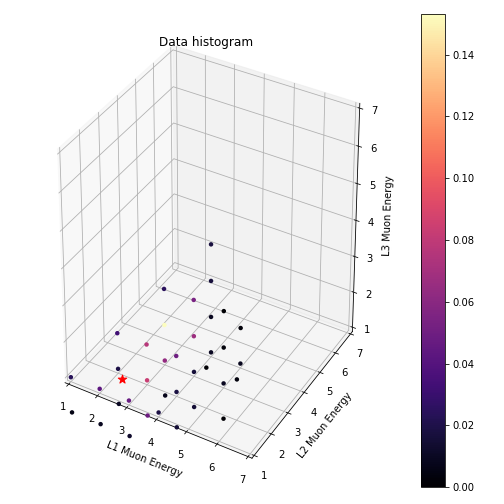

Sample Index: 2863
8000
Prob of Sample Index: 0.01017523692595019
Weight Array: 0.01017523692595019
(7, 3, 3)
[1623.776739188721, 88.58667904100822, 88.58667904100822]


In [120]:
%matplotlib notebook
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

Hist4D=np.load('/data/user/vbasu/SelfVetoArrays/Triple_Zen_0.17_Depth_1.5.npy',allow_pickle=True)
print(np.shape(Hist4D))
index=(np.linspace(0,len(Hist4D)-1,len(Hist4D),dtype=int))
gridpts=np.logspace(1,7,len(Hist4D))
weight_array=Hist4D[:,:,:,test_index]/np.sum(Hist4D[:,:,:,test_index])
# indexarray=np.vstack(list(map(np.ravel, np.meshgrid(index,index,index))))
index=(np.linspace(0,len(Hist4D)-1,len(Hist4D),dtype=int))
indexarray=np.arange(len(index)**3)
probarray=(weight_array).ravel()
sample_indices = np.random.choice(len(indexarray), 1, p=probarray)[0]
print('Sample Index:',sample_indices)
print('Prob of Sample Index:',probarray[sample_indices])
weight_index=np.unravel_index(sample_indices, (len(index), len(index),len(index)))
print('Weight Array:',weight_array[weight_index])

inj_muon_energies=[gridpts[weight_index[0]],gridpts[weight_index[1]],gridpts[weight_index[2]]]
print(inj_muon_energies)



X = np.log10(gridpts)
Y = np.log10(gridpts)
Z=np.log10(gridpts)

X, Y, Z = np.meshgrid(X, Y, Z, indexing="ij")
density_matrix = weight_array
plot4d(density_matrix,'Data histogram',markerenergy=inj_muon_energies)
Hist4D=np.load('/data/user/vbasu/SelfVetoArrays/TripleSpline_Zen_0.17_Depth_1.5.npy',allow_pickle=True)
gridpts=np.logspace(1,7,len(Hist4D))
weight_array=Hist4D[:,:,:,test_index].T/np.sum(Hist4D[:,:,:,test_index])
X = np.log10(gridpts)
Y = np.log10(gridpts)
Z=np.log10(gridpts)

X, Y, Z = np.meshgrid(X, Y, Z, indexing="ij")

index=(np.linspace(0,len(Hist4D)-1,len(Hist4D),dtype=int))
indexarray=np.arange(len(index)**3)
probarray=(weight_array).ravel()
sample_indices = np.random.choice(len(indexarray), 1, p=probarray)[0]
print('Sample Index:',sample_indices)
print(len(indexarray))
print('Prob of Sample Index:',probarray[sample_indices])
weight_index=np.unravel_index(sample_indices, (len(index), len(index),len(index)))
print('Weight Array:',weight_array[weight_index])
print(weight_index)
inj_muon_energies=[gridpts[weight_index[0]],gridpts[weight_index[1]],gridpts[weight_index[2]]]
print(inj_muon_energies)
density_matrix = weight_array
# plot4d(density_matrix,'Spline',markerenergy=inj_muon_energies)
    
# Hist3D=Hist4D[:,:,:,test_index]
# Hist3D=Hist3D/np.sum(Hist3D)
# xv, yv,zv=np.meshgrid(np.log10(mu_bin_centers),np.log10(mu_bin_centers),np.log10(mu_bin_centers))
# mask=np.where(Hist3D!=0)


# grid_z1 = griddata((xv[mask],yv[mask],zv[mask]), Hist3D[mask], (plotx,ploty,plotz), method='linear')
# grid_z1=np.nan_to_num(grid_z1)
# grid_z1=grid_z1/np.sum(grid_z1)

# Hist4D_splined[:,:,:,test_index]=grid_z1.T

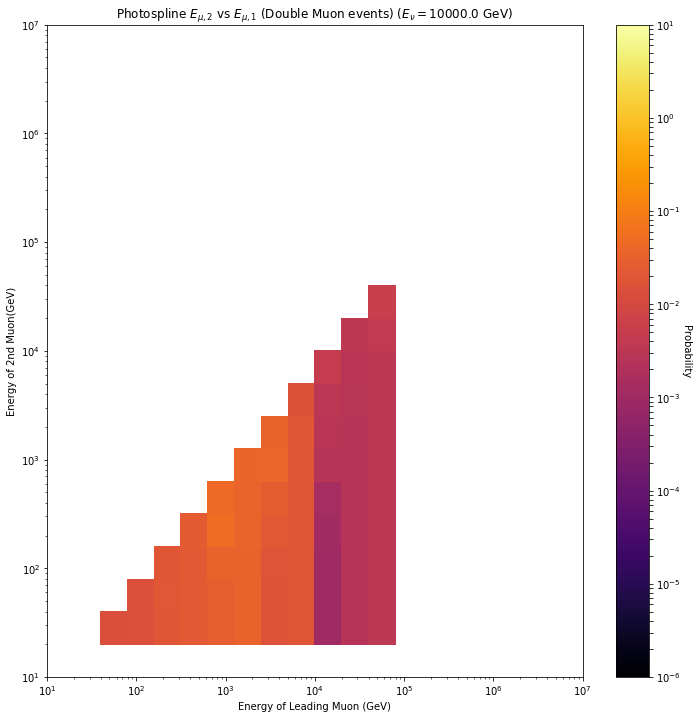

<Figure size 432x288 with 0 Axes>

In [5]:

order = 1
penalty_order = order
knots = [np.logspace(1,7,20+1),np.logspace(1,7,20+1)]
smooth = 3e3
x1 = E_mu_bins

z = Hist2D.T# only use populated bins for spline fitting
# np.nonzero()
maxindex=np.unravel_index(np.argmax(z, axis=None), z.shape)
peak=[x1[maxindex[0]],x1[maxindex[1]]]

population_limit=(np.where(np.sum(z,axis=0)==0))[0][0]-1
mask=np.zeros(np.shape(z),dtype=int)
E_limit=1e4
for i in range(np.digitize(E_limit,E_mu_bins)):
    for j in range(len(z)):
        mask[j][i]=1
mask=mask.ravel()
Filledmask=np.where(z.ravel()!=0, True, False).tolist()

w=np.zeros(np.shape(Filledmask))
w[np.logical_and.reduce((Filledmask,mask))]=1+z.ravel()[np.logical_and.reduce((Filledmask,mask))]
zs, w = ndsparse.from_data(z, w.reshape(np.shape(z)))
spline = glam_fit(zs,w,
                  [x1,x1],
                  knots,
                  [order,order],
                  [smooth,smooth],
                  [penalty_order,penalty_order]
                 )

spline.write('splinefit-2D.fits')

plt.figure(figsize=(12,12))
# Plot individual basis splines
xfine = np.logspace(np.log10(knots[0][0]), np.log10(knots[0][-1]), 20+1)
yfine = np.logspace(np.log10(knots[1][0]), np.log10(knots[1][-1]), 20+1)

splinedfit=spline.grideval([xfine,yfine])
splinepeak=[np.digitize(peak[0],xfine)-1,np.digitize(peak[1],yfine)-1]
mask=np.zeros(np.shape(splinedfit),dtype=int)
limit=np.digitize(E_mu_bins[population_limit],xfine)
masked_spline=np.zeros(np.shape(splinedfit))
for i in range(limit):
    for j in range(i):
        mask[j][i]=1


masked_spline[mask!=0]=splinedfit[mask!=0]
masked_spline=masked_spline/np.sum(masked_spline)

from matplotlib import colors as clrs
linestyles=['solid','dotted','dashed','dashdot']
cm = plt.get_cmap('inferno')
colors = [cm(x) for x in np.linspace(0.2, 0.9, len(E_nu_bins))]
# Plot the spline surface (sum of all the basis functions)

# pylab.plot(xfine, spline.grideval([xfine]), label='Spline fit', color='k')
im = plt.pcolormesh(xfine, yfine, masked_spline, cmap='inferno',norm=clrs.LogNorm(vmin=10**(-6), vmax=10))
plt.xscale('log')
plt.xlabel('Energy of Leading Muon (GeV)')
plt.ylabel(r'Energy of 2nd Muon(GeV)')
plt.yscale('log')
plt.title(r'Photospline $E_{\mu,2}$ vs $E_{\mu,1}$ (Double Muon events) ($E_{\nu}=$' +str(np.around(test_nu_energy,decimals=2))+' GeV) ')

cbar=plt.colorbar()
cbar.set_label('Probability', rotation=270, labelpad=10)
plt.savefig("NormedSpline.png")
plt.show()
plt.clf()



In [2]:
Hist5D=np.load('/data/user/vbasu/SelfVetoArrays/Quintuple_Zen_0.17_Depth_1.5.npy',allow_pickle=True)[:,:,:,:,test_index]
print(np.sum(Hist5D))
order = 1
penalty_order = order
knots = [np.logspace(1,7,20+1),np.logspace(1,7,20+1),np.logspace(1,7,20+1),np.logspace(1,7,20+1)]
smooth = 3e3
x1 = E_mu_bins

z = Hist5D.T# only use populated bins for spline fitting
# np.nonzero()
maxindex=np.unravel_index(np.argmax(z, axis=None), z.shape)
peak=[x1[maxindex[0]],
      x1[maxindex[1]],
      x1[maxindex[2]],
      x1[maxindex[3]],,
     ]
print(peak)
population_limit=(np.where(np.sum(z,axis=0)==0))[0]-1
mask=np.zeros(np.shape(z),dtype=int)
E_limit=1e4
for i in range(np.digitize(E_limit,E_mu_bins)):
    for j in range(len(z)):
        for k in range(len(z)):
            for t in range(len(z)):
                    mask[t][k][j][i]=1
mask=mask.ravel()
Filledmask=np.where(z.ravel()!=0, True, False).tolist()

w=np.zeros(np.shape(Filledmask))
w[np.logical_and.reduce((Filledmask,mask))]=1+z.ravel()[np.logical_and.reduce((Filledmask,mask))]
zs, w = ndsparse.from_data(z, w.reshape(np.shape(z)))
spline = glam_fit(zs,w,
                  [x1,x1,x1,x1],
                  knots,
                  [order,order,order,order],
                  [smooth,smooth,smooth,smooth],
                  [penalty_order,penalty_order,penalty_order,penalty_order]
                 )

spline.write('splinefit-4D.fits')

# plt.figure(figsize=(12,12))
# # Plot individual basis splines
# xfine = np.logspace(np.log10(knots[0][0]), np.log10(knots[0][-1]), 20+1)
# yfine = np.logspace(np.log10(knots[1][0]), np.log10(knots[1][-1]), 20+1)

# splinedfit=spline.grideval([xfine,yfine])
# splinepeak=[np.digitize(peak[0],xfine)-1,np.digitize(peak[1],yfine)-1]
# mask=np.zeros(np.shape(splinedfit),dtype=int)
# limit=np.digitize(E_mu_bins[population_limit],xfine)
# masked_spline=np.zeros(np.shape(splinedfit))
# for i in range(limit):
#     for j in range(i):
#         mask[j][i]=1


# masked_spline[mask!=0]=splinedfit[mask!=0]
# masked_spline=masked_spline/np.sum(masked_spline)

# from matplotlib import colors as clrs
# linestyles=['solid','dotted','dashed','dashdot']
# cm = plt.get_cmap('inferno')
# colors = [cm(x) for x in np.linspace(0.2, 0.9, len(E_nu_bins))]
# # Plot the spline surface (sum of all the basis functions)

# # pylab.plot(xfine, spline.grideval([xfine]), label='Spline fit', color='k')
# im = plt.pcolormesh(xfine, yfine, masked_spline, cmap='inferno',norm=clrs.LogNorm(vmin=10**(-6), vmax=10))
# plt.xscale('log')
# plt.xlabel('Energy of Leading Muon (GeV)')
# plt.ylabel(r'Energy of 2nd Muon(GeV)')
# plt.yscale('log')
# plt.title(r'Photospline $E_{\mu,2}$ vs $E_{\mu,1}$ (Double Muon events) ($E_{\nu}=$' +str(np.around(test_nu_energy,decimals=2))+' GeV) ')

# cbar=plt.colorbar()
# cbar.set_label('Probability', rotation=270, labelpad=10)
# plt.savefig("NormedSpline.png")
# plt.show()
# plt.clf()



0.012397916510159215
[158.48931924611142, 158.48931924611142, 630.957344480193, 630.957344480193, 630.957344480193]


In [2]:
#works for 2D
points =(np.log10(mu_bin_centers), np.log10(mu_bin_centers))
gridpts=np.logspace(0,8,100+1)
plotx,ploty=np.meshgrid(np.log10(gridpts),np.log10(gridpts))
print(np.shape(points))

from matplotlib import colors as clrs
linestyles=['solid','dotted','dashed','dashdot']
cm = plt.get_cmap('inferno')
colors = [cm(x) for x in np.linspace(0.2, 0.9, len(E_nu_bins))]
Data=interpn(points,Hist2D,(plotx,ploty),method='linear',bounds_error=False, fill_value=0)
plt.figure(figsize=(12,12))
plt.axis('equal')
im = plt.pcolormesh(gridpts, gridpts,Data, cmap='inferno',norm=clrs.LogNorm(vmin=10**(-6), vmax=10))
plt.title("Leading v SubleadingMuon Energy", fontsize=20)
plt.xscale('log')
plt.xlabel('Energy of Energy Shower Neutrino (GeV)')
plt.ylabel(r'Energy of Leading Muon(GeV)')
plt.yscale('log')
plt.title(r'$E_{\mu,2}$ vs $E_{\mu,1}$ (Single Muon events) ($E_{\nu}=$' +str(np.around(test_nu_energy,decimals=2))+' GeV) ')

cbar=plt.colorbar()
cbar.set_label('Probability', rotation=270, labelpad=10)
plt.savefig("NormedInterpn.png")
plt.xlim(1e1,1e7)
plt.ylim(1e1,1e7)
plt.show()
plt.clf()


NameError: name 'np' is not defined

<Figure size 864x864 with 0 Axes>

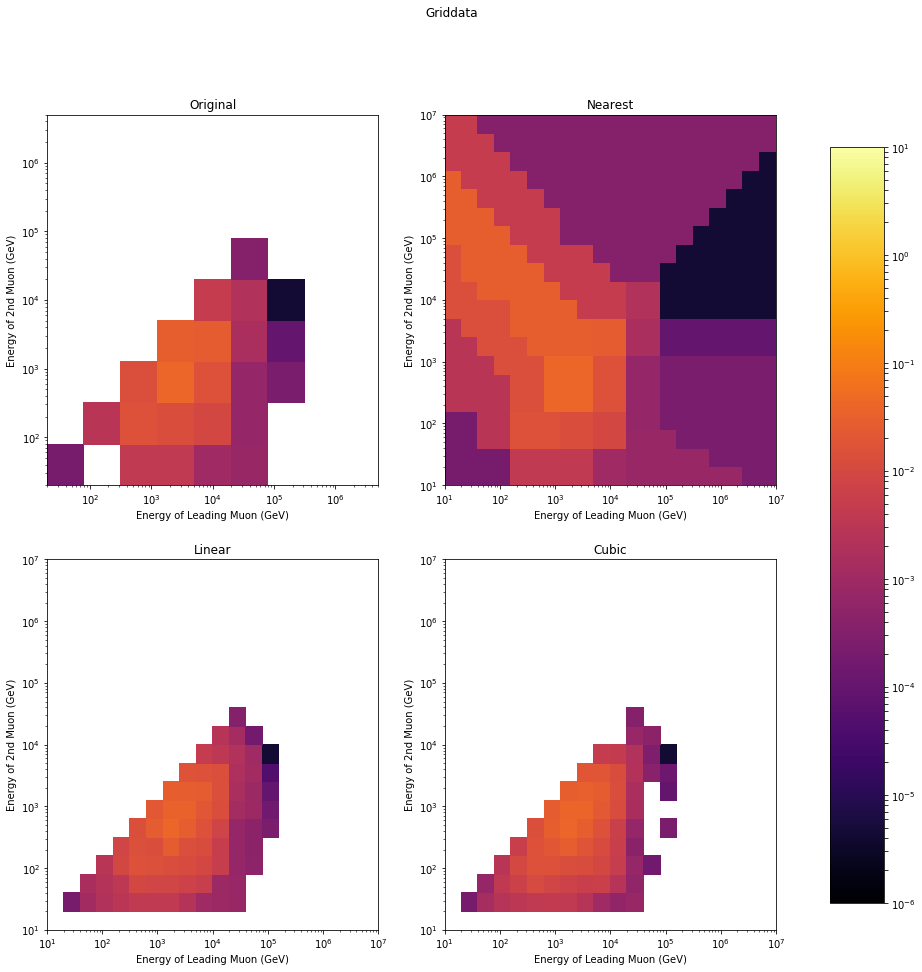

(21, 21)
(10, 10, 10)


In [65]:
xv, yv=np.meshgrid(np.log10(mu_bin_centers),np.log10(mu_bin_centers))
mask=np.where(Hist2D!=0)
from matplotlib import colors as clrs
gridpts=np.logspace(1,7,20+1)
plotx,ploty=np.meshgrid(np.log10(gridpts),np.log10(gridpts))
from scipy.interpolate import griddata
grid_z0 = griddata((xv[mask],yv[mask]), Hist2D[mask], (plotx,ploty), method='nearest')
grid_z1 = griddata((xv[mask],yv[mask]), Hist2D[mask], (plotx,ploty), method='linear')
grid_z2 = griddata((xv[mask],yv[mask]), Hist2D[mask], (plotx,ploty), method='cubic')

plt.figure(figsize=(12,12))

# Four axes, returned as a 2-d array
f, axarr = plt.subplots(2,2,figsize=(15,15))
# plt.pcolormesh(gridpts, gridpts,Data, cmap='inferno',norm=clrs.LogNorm(vmin=10**(-6), vmax=10))
im=axarr[0, 0].pcolormesh(10**xv, 10**yv,Hist2D.T,cmap='inferno',norm=clrs.LogNorm(vmin=10**(-6), vmax=10))
axarr[0, 0].set_title('Original')
axarr[0, 0].set_xscale('log')
axarr[0, 0].set_xlabel('Energy of Leading Muon (GeV)')
axarr[0, 0].set_ylabel('Energy of 2nd Muon (GeV)')
axarr[0, 0].set_yscale('log')
im=axarr[0, 1].pcolormesh(10**plotx, 10**ploty,grid_z0.T,cmap='inferno',norm=clrs.LogNorm(vmin=10**(-6), vmax=1))
axarr[0, 1].set_title('Nearest')
axarr[0, 1].set_xscale('log')
axarr[0, 1].set_xlabel('Energy of Leading Muon (GeV)')
axarr[0, 1].set_ylabel('Energy of 2nd Muon (GeV)')
axarr[0, 1].set_yscale('log')
im=axarr[1, 0].pcolormesh(10**plotx, 10**ploty,grid_z1.T,cmap='inferno',norm=clrs.LogNorm(vmin=10**(-6), vmax=1))
axarr[1, 0].set_title('Linear')
axarr[1, 0].set_xscale('log')
axarr[1, 0].set_xlabel('Energy of Leading Muon (GeV)')
axarr[1, 0].set_ylabel('Energy of 2nd Muon (GeV)')
axarr[1, 0].set_yscale('log')
im=axarr[1, 1].pcolormesh(10**plotx, 10**ploty,grid_z2.T,cmap='inferno',norm=clrs.LogNorm(vmin=10**(-6), vmax=1))
axarr[1, 1].set_title('Cubic')
axarr[1, 1].set_xscale('log')
axarr[1, 1].set_xlabel('Energy of Leading Muon (GeV)')
axarr[1, 1].set_ylabel('Energy of 2nd Muon (GeV)')
axarr[1, 1].set_yscale('log')
f.suptitle('Griddata')
# Fine-tune figure; hide x ticks for top plots and y ticks for right plots
# plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False)
# plt.setp([a.get_yticklabels() for a in axarr[:, 1]], visible=False)
f.subplots_adjust(right=0.8)
cbar_ax = f.add_axes([0.85, 0.15, 0.05, 0.7])
f.colorbar(im, cax=cbar_ax)
plt.show()
# print(np.shape(grid_z1))

# print(np.sum(grid_z1))
grid_z1=np.nan_to_num(grid_z1)
grid_z1=grid_z1/np.sum(grid_z1)
print(np.shape(grid_z1))
print(np.shape(Hist3D))

In [2]:
# low_angles= np.linspace(0,0.5,13)
# high_angles=np.linspace(0.5,1,13)
# new_low_angles=np.delete(low_angles,0) 
# angles_space=np.concatenate( (new_low_angles,high_angles) )
# # print ('angles_space')
# # print (angles_space)

# depth_space = np.linspace(1.5,2.5,26)
# low_angles= np.linspace(0,0.5,13)
# high_angles=np.linspace(0.5,1,13)
# new_low_angles=np.delete(low_angles,0) 
# angles_space=np.concatenate( (new_low_angles,high_angles) )


# deep=2.06

# #Angle-depth bins
# import pylab
# %matplotlib inline
# import matplotlib.pyplot as plt
# from scipy.interpolate import make_interp_spline, CubicSpline, pchip_interpolate
# import scipy.special as sp
# from random import seed
# import random
# # seed(1234)
# E_nu_bins=np.logspace(2,7,10+1)
# nu_bin_centers = np.sqrt(E_nu_bins[:-1] * E_nu_bins[1:])
# E_mu_bins=np.logspace(0,7,10+1)
# mu_bin_centers = np.sqrt(E_mu_bins[:-1] * E_mu_bins[1:])

# # Import curve fitting package from scipy
# from scipy.optimize import curve_fit
# def polygaussian(x,c, gauss_mean, gauss_sigma,d ):#
#     normpdf=c*np.exp(-(x-gauss_mean)**2/(2*gauss_sigma**2))-d
#     return normpdf

# FaultyArrays=[]
# ctr=0
# from matplotlib import colors as clrs
# linestyles=['solid','dotted','dashed','dashdot']
# cm = plt.get_cmap('inferno')
# colors = [cm(x) for x in np.linspace(0.2, 0.9, len(E_nu_bins))]
# for angle in angles_space:
#     for depth in depth_space:
#         coszen=np.around(angle,decimals=2)
#         depth=np.around(depth,decimals=2)
#         filelist=sorted(glob.glob('/data/user/vbasu/SelfVetoArrays/Gaussian_Zen_'+str(coszen)+'_Depth_'+str(depth)+'*.npy'))
#         array_params=[]
#         for file in filelist:
#             E_nu=float(file.split('/')[-1].split('_')[-1][:-4])
#             popt=np.load(file,allow_pickle=True)
# #             print (popt)
#             if popt is None:continue
#             if hasattr(popt[1], '__iter__'):
#                 popt[1]=popt[1][0]
#                 popt[2]=popt[2][0]
#             array_params.append(np.asarray([popt[1],popt[2],E_nu]))
#         file_array=np.asarray(sorted(array_params, key=lambda x: x[-1]))
#         print(np.shape(file_array))
#         filename='/data/user/vbasu/SelfVetoArrays/SingleSplined_Zen_'+str(coszen)+'_Depth_'+str(depth)+'.npy'
#         print('SingleSplined_Zen_'+str(coszen)+'_Depth_'+str(depth)+'.npy')
#         np.save(filename, file_array)

(10, 3)
SingleSplined_Zen_0.04_Depth_1.5.npy
(0,)
SingleSplined_Zen_0.04_Depth_1.54.npy
(0,)
SingleSplined_Zen_0.04_Depth_1.58.npy
(0,)
SingleSplined_Zen_0.04_Depth_1.62.npy
(0,)
SingleSplined_Zen_0.04_Depth_1.66.npy
(0,)
SingleSplined_Zen_0.04_Depth_1.7.npy
(0,)
SingleSplined_Zen_0.04_Depth_1.74.npy
(0,)
SingleSplined_Zen_0.04_Depth_1.78.npy
(0,)
SingleSplined_Zen_0.04_Depth_1.82.npy
(0,)
SingleSplined_Zen_0.04_Depth_1.86.npy
(0,)
SingleSplined_Zen_0.04_Depth_1.9.npy
(0,)
SingleSplined_Zen_0.04_Depth_1.94.npy
(0,)
SingleSplined_Zen_0.04_Depth_1.98.npy
(0,)
SingleSplined_Zen_0.04_Depth_2.02.npy
(0,)
SingleSplined_Zen_0.04_Depth_2.06.npy
(0,)
SingleSplined_Zen_0.04_Depth_2.1.npy
(0,)
SingleSplined_Zen_0.04_Depth_2.14.npy
(0,)
SingleSplined_Zen_0.04_Depth_2.18.npy
(0,)
SingleSplined_Zen_0.04_Depth_2.22.npy
(0,)
SingleSplined_Zen_0.04_Depth_2.26.npy
(0,)
SingleSplined_Zen_0.04_Depth_2.3.npy
(0,)
SingleSplined_Zen_0.04_Depth_2.34.npy
(0,)
SingleSplined_Zen_0.04_Depth_2.38.npy
(0,)
SingleSp

(0,)
SingleSplined_Zen_0.33_Depth_1.86.npy
(0,)
SingleSplined_Zen_0.33_Depth_1.9.npy
(0,)
SingleSplined_Zen_0.33_Depth_1.94.npy
(0,)
SingleSplined_Zen_0.33_Depth_1.98.npy
(0,)
SingleSplined_Zen_0.33_Depth_2.02.npy
(0,)
SingleSplined_Zen_0.33_Depth_2.06.npy
(0,)
SingleSplined_Zen_0.33_Depth_2.1.npy
(0,)
SingleSplined_Zen_0.33_Depth_2.14.npy
(0,)
SingleSplined_Zen_0.33_Depth_2.18.npy
(0,)
SingleSplined_Zen_0.33_Depth_2.22.npy
(0,)
SingleSplined_Zen_0.33_Depth_2.26.npy
(0,)
SingleSplined_Zen_0.33_Depth_2.3.npy
(0,)
SingleSplined_Zen_0.33_Depth_2.34.npy
(0,)
SingleSplined_Zen_0.33_Depth_2.38.npy
(0,)
SingleSplined_Zen_0.33_Depth_2.42.npy
(0,)
SingleSplined_Zen_0.33_Depth_2.46.npy
(0,)
SingleSplined_Zen_0.33_Depth_2.5.npy
(0,)
SingleSplined_Zen_0.38_Depth_1.5.npy
(0,)
SingleSplined_Zen_0.38_Depth_1.54.npy
(0,)
SingleSplined_Zen_0.38_Depth_1.58.npy
(0,)
SingleSplined_Zen_0.38_Depth_1.62.npy
(0,)
SingleSplined_Zen_0.38_Depth_1.66.npy
(0,)
SingleSplined_Zen_0.38_Depth_1.7.npy
(0,)
SingleSpline

SingleSplined_Zen_0.58_Depth_2.34.npy
(0,)
SingleSplined_Zen_0.58_Depth_2.38.npy
(0,)
SingleSplined_Zen_0.58_Depth_2.42.npy
(0,)
SingleSplined_Zen_0.58_Depth_2.46.npy
(0,)
SingleSplined_Zen_0.58_Depth_2.5.npy
(0,)
SingleSplined_Zen_0.62_Depth_1.5.npy
(0,)
SingleSplined_Zen_0.62_Depth_1.54.npy
(0,)
SingleSplined_Zen_0.62_Depth_1.58.npy
(0,)
SingleSplined_Zen_0.62_Depth_1.62.npy
(0,)
SingleSplined_Zen_0.62_Depth_1.66.npy
(0,)
SingleSplined_Zen_0.62_Depth_1.7.npy
(0,)
SingleSplined_Zen_0.62_Depth_1.74.npy
(0,)
SingleSplined_Zen_0.62_Depth_1.78.npy
(0,)
SingleSplined_Zen_0.62_Depth_1.82.npy
(0,)
SingleSplined_Zen_0.62_Depth_1.86.npy
(0,)
SingleSplined_Zen_0.62_Depth_1.9.npy
(0,)
SingleSplined_Zen_0.62_Depth_1.94.npy
(0,)
SingleSplined_Zen_0.62_Depth_1.98.npy
(0,)
SingleSplined_Zen_0.62_Depth_2.02.npy
(0,)
SingleSplined_Zen_0.62_Depth_2.06.npy
(7, 3)
SingleSplined_Zen_0.62_Depth_2.1.npy
(0,)
SingleSplined_Zen_0.62_Depth_2.14.npy
(0,)
SingleSplined_Zen_0.62_Depth_2.18.npy
(0,)
SingleSplined_

(0,)
SingleSplined_Zen_0.92_Depth_1.7.npy
(0,)
SingleSplined_Zen_0.92_Depth_1.74.npy
(0,)
SingleSplined_Zen_0.92_Depth_1.78.npy
(0,)
SingleSplined_Zen_0.92_Depth_1.82.npy
(0,)
SingleSplined_Zen_0.92_Depth_1.86.npy
(0,)
SingleSplined_Zen_0.92_Depth_1.9.npy
(0,)
SingleSplined_Zen_0.92_Depth_1.94.npy
(0,)
SingleSplined_Zen_0.92_Depth_1.98.npy
(0,)
SingleSplined_Zen_0.92_Depth_2.02.npy
(0,)
SingleSplined_Zen_0.92_Depth_2.06.npy
(0,)
SingleSplined_Zen_0.92_Depth_2.1.npy
(0,)
SingleSplined_Zen_0.92_Depth_2.14.npy
(0,)
SingleSplined_Zen_0.92_Depth_2.18.npy
(0,)
SingleSplined_Zen_0.92_Depth_2.22.npy
(0,)
SingleSplined_Zen_0.92_Depth_2.26.npy
(7, 3)
SingleSplined_Zen_0.92_Depth_2.3.npy
(0,)
SingleSplined_Zen_0.92_Depth_2.34.npy
(7, 3)
SingleSplined_Zen_0.92_Depth_2.38.npy
(0,)
SingleSplined_Zen_0.92_Depth_2.42.npy
(0,)
SingleSplined_Zen_0.92_Depth_2.46.npy
(0,)
SingleSplined_Zen_0.92_Depth_2.5.npy
(0,)
SingleSplined_Zen_0.96_Depth_1.5.npy
(0,)
SingleSplined_Zen_0.96_Depth_1.54.npy
(0,)
SingleSp

In [ ]:
# Zen_0.17_Depth_1.5
gridpts=np.logspace(1,7,20)
import os
plotx,ploty=np.meshgrid(np.log10(gridpts),np.log10(gridpts))
from scipy.interpolate import griddata
for angle in angles_space:
    for depth in depth_space:
        coszen=np.around(angle,decimals=2)
        depth=np.around(depth,decimals=2)
        filename='/data/user/vbasu/SelfVetoArrays/Double_Zen_'+str(coszen)+'_Depth_'+str(depth)+'.npy'
        if not os.path.exists(filename):continue
        Hist3D=np.load('/data/user/vbasu/SelfVetoArrays/Double_Zen_'+str(coszen)+'_Depth_'+str(depth)+'.npy')
        Hist3D_splined=np.empty((len(gridpts),len(gridpts),len(E_nu_bins)))
        for test_index in range(len(E_nu_bins)-1):
            test_nu_energy=E_nu_bins[test_index]
            print('Test Energy:',np.around(test_nu_energy,decimals=2),'GeV')
            Hist2D=Hist3D[:,:,test_index]
            Hist2D=Hist2D/np.sum(Hist2D)
            xv, yv=np.meshgrid(np.log10(mu_bin_centers),np.log10(mu_bin_centers))
            mask=np.where(Hist2D!=0)

            try:
                grid_z1 = griddata((xv[mask],yv[mask]), Hist2D[mask], (plotx,ploty), method='linear')
                grid_z1=np.nan_to_num(grid_z1)
                grid_z1=grid_z1/np.sum(grid_z1)

                Hist3D_splined[:,:,test_index]=grid_z1.T
            except Exception as e:
                finearray=(Hist2D.T).repeat(2, 0).repeat(2, 1)
#                 print(np.shape(finearray),np.shape(Hist3D_splined[:,:,test_index]))
                Hist3D_splined[:,:,test_index]=finearray
        filename='/data/user/vbasu/SelfVetoArrays/DoubleSpline_Zen_'+str(coszen)+'_Depth_'+str(depth)+'.npy'
        print('Zen_'+str(coszen)+'_Depth_'+str(depth))
        np.save(filename, Hist3D_splined)

In [17]:
# Zen_0.17_Depth_1.5
gridpts=np.logspace(1,7,20)
import os
plotx,ploty=np.meshgrid(np.log10(gridpts),np.log10(gridpts))
from scipy.interpolate import griddata
for angle in angles_space:
    for depth in depth_space:
        coszen=np.around(angle,decimals=2)
        depth=np.around(depth,decimals=2)
        filename='/data/user/vbasu/SelfVetoArrays/Double_Zen_'+str(coszen)+'_Depth_'+str(depth)+'.npy'
        if not os.path.exists(filename):continue
        Hist3D=np.load('/data/user/vbasu/SelfVetoArrays/Double_Zen_'+str(coszen)+'_Depth_'+str(depth)+'.npy')
        Hist3D_splined=np.empty((len(gridpts),len(gridpts),len(E_nu_bins)))
        for test_index in range(len(E_nu_bins)-1):
            test_nu_energy=E_nu_bins[test_index]
            print('Test Energy:',np.around(test_nu_energy,decimals=2),'GeV')
            Hist2D=Hist3D[:,:,test_index]
            Hist2D=Hist2D/np.sum(Hist2D)
            xv, yv=np.meshgrid(np.log10(mu_bin_centers),np.log10(mu_bin_centers))
            mask=np.where(Hist2D!=0)

            try:
                grid_z1 = griddata((xv[mask],yv[mask]), Hist2D[mask], (plotx,ploty), method='linear')
                grid_z1=np.nan_to_num(grid_z1)
                grid_z1=grid_z1/np.sum(grid_z1)

                Hist3D_splined[:,:,test_index]=grid_z1.T
            except Exception as e:
                finearray=(Hist2D.T).repeat(2, 0).repeat(2, 1)
#                 print(np.shape(finearray),np.shape(Hist3D_splined[:,:,test_index]))
                Hist3D_splined[:,:,test_index]=finearray
        filename='/data/user/vbasu/SelfVetoArrays/DoubleSpline_Zen_'+str(coszen)+'_Depth_'+str(depth)+'.npy'
        print('Zen_'+str(coszen)+'_Depth_'+str(depth))
        np.save(filename, Hist3D_splined)

Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.04_Depth_1.5
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.04_Depth_1.54
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.04_Depth_1.58
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Tes

/cvmfs/icecube.opensciencegrid.org/py3-v4.1.1/RHEL_7_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/cvmfs/icecube.opensciencegrid.org/py3-v4.1.1/RHEL_7_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide


Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.04_Depth_1.74
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.04_Depth_1.78
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.04_Depth_1.82
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Te

Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.08_Depth_1.9
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.08_Depth_1.94
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.08_Depth_1.98
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.08_Depth_2.02
Test Energy: 100.0 GeV

Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.12_Depth_2.06
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.12_Depth_2.1
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.12_Depth_2.14
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.12_Depth_2.18
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test 

Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.17_Depth_2.3
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.17_Depth_2.34
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.17_Depth_2.38
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Tes

Zen_0.21_Depth_2.42
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.21_Depth_2.46
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.21_Depth_2.5
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.25_Depth_1.5
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energ

Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.29_Depth_1.74
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.29_Depth_1.78
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.29_Depth_1.82
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.29_Depth_1.86
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test

Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.33_Depth_1.98
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.33_Depth_2.02
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.33_Depth_2.06
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Te

Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.38_Depth_2.14
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.38_Depth_2.18
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.38_Depth_2.22
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.38_Depth_2.26
Test Energy: 100.0 Ge

Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.42_Depth_2.34
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.42_Depth_2.38
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.42_Depth_2.42
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Te

Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.5_Depth_1.54
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.5_Depth_1.58
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.5_Depth_1.62
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test 

Zen_0.5_Depth_1.82
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.5_Depth_1.86
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.5_Depth_1.9
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.5_Depth_1.94
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 

Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.54_Depth_2.1
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.54_Depth_2.14
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.54_Depth_2.18
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.54_Depth_2.22
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Tes

Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.58_Depth_2.34
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.58_Depth_2.38
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.58_Depth_2.42
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 316227

Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.67_Depth_1.7
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.67_Depth_1.74
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.67_Depth_1.78
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Tes

Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.71_Depth_1.98
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.71_Depth_2.02
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.71_Depth_2.06
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Te

Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.75_Depth_2.14
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.75_Depth_2.18
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.75_Depth_2.22
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Te

Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.79_Depth_2.42
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.79_Depth_2.46
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.79_Depth_2.5
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.83_Depth_1.5
Test Energy: 100.0 GeV


Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.88_Depth_1.66
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.88_Depth_1.7
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.88_Depth_1.74
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Tes

Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.92_Depth_1.86
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.92_Depth_1.9
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.92_Depth_1.94
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.92_Depth_1.98
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
T

Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.96_Depth_2.14
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.96_Depth_2.18
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.96_Depth_2.22
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0

In [9]:
# Triple
gridpts=np.logspace(1,7,20)
import os
plotx,ploty,plotz=np.meshgrid(np.log10(gridpts),np.log10(gridpts),np.log10(gridpts))
from scipy.interpolate import griddata
for angle in angles_space:
    for depth in depth_space:
        coszen=np.around(angle,decimals=2)
        depth=np.around(depth,decimals=2)
        filename='/data/user/vbasu/SelfVetoArrays/Triple_Zen_'+str(coszen)+'_Depth_'+str(depth)+'.npy'
        if not os.path.exists(filename):continue
        Hist4D=np.load('/data/user/vbasu/SelfVetoArrays/Triple_Zen_'+str(coszen)+'_Depth_'+str(depth)+'.npy')
        print(np.shape(Hist4D))
        Hist4D_splined=np.empty((len(gridpts),len(gridpts),len(gridpts),len(E_nu_bins)))
        for test_index in range(len(E_nu_bins)-1):
            test_nu_energy=E_nu_bins[test_index]
            print('Test Energy:',np.around(test_nu_energy,decimals=2),'GeV')
            Hist3D=Hist4D[:,:,:,test_index]
            Hist3D=Hist3D/np.sum(Hist3D)
            xv, yv,zv=np.meshgrid(np.log10(mu_bin_centers),np.log10(mu_bin_centers),np.log10(mu_bin_centers))
            mask=np.where(Hist3D!=0)

            try:
                grid_z1 = griddata((xv[mask],yv[mask],zv[mask]), Hist3D[mask], (plotx,ploty,plotz), method='linear')
                grid_z1=np.nan_to_num(grid_z1)
                grid_z1=grid_z1/np.sum(grid_z1)

                Hist4D_splined[:,:,:,test_index]=grid_z1.T
            except Exception as e:
                finearray=(Hist3D.T).repeat(2, 0).repeat(2, 1).repeat(2, 2)
#                 print(np.shape(finearray))
                Hist4D_splined[:,:,:,test_index]=finearray
        filename='/data/user/vbasu/SelfVetoArrays/TripleSpline_Zen_'+str(coszen)+'_Depth_'+str(depth)+'.npy'
        print('Zen_'+str(coszen)+'_Depth_'+str(depth))
        np.save(filename, Hist4D_splined)

(10, 10, 10, 10)
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV


/cvmfs/icecube.opensciencegrid.org/py3-v4.1.1/RHEL_7_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
/cvmfs/icecube.opensciencegrid.org/py3-v4.1.1/RHEL_7_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.04_Depth_1.5
(10, 10, 10, 10)
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.04_Depth_1.66
(10, 10, 10, 10)
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.04_Depth_1.94
(10, 10, 10, 10)
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.

Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.12_Depth_1.58
(10, 10, 10, 10)
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.12_Depth_1.62
(10, 10, 10, 10)
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.12_Depth_1.66
(10, 10, 10, 10)
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.12_Depth_1.7
(10, 10, 10, 10)
Test E

Test Energy: 3162277.66 GeV
Zen_0.17_Depth_1.66
(10, 10, 10, 10)
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.17_Depth_1.7
(10, 10, 10, 10)
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.17_Depth_1.74
(10, 10, 10, 10)
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.17_Depth_1.78
(10, 10, 10, 10)
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 

Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.21_Depth_1.78
(10, 10, 10, 10)
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.21_Depth_1.82
(10, 10, 10, 10)
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.21_Depth_1.86
(10, 10, 10, 10)
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.21_Depth_1.9
(10, 10, 10, 10)
Test Energy: 100.0 GeV
Test Energ

Zen_0.25_Depth_1.86
(10, 10, 10, 10)
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.25_Depth_1.9
(10, 10, 10, 10)
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.25_Depth_1.94
(10, 10, 10, 10)
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.25_Depth_1.98
(10, 10, 10, 10)
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162

Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.29_Depth_1.98
(10, 10, 10, 10)
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.29_Depth_2.02
(10, 10, 10, 10)
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.29_Depth_2.06
(10, 10, 10, 10)
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.29_Depth_2.1
(10, 10, 10, 10)
Test Energy: 100.0 GeV
Test Energ

Test Energy: 3162277.66 GeV
Zen_0.33_Depth_2.06
(10, 10, 10, 10)
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.33_Depth_2.1
(10, 10, 10, 10)
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.33_Depth_2.14
(10, 10, 10, 10)
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.33_Depth_2.18
(10, 10, 10, 10)
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 

Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.38_Depth_2.18
(10, 10, 10, 10)
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.38_Depth_2.22
(10, 10, 10, 10)
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.38_Depth_2.26
(10, 10, 10, 10)
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.38_Depth_2.3
(10, 10, 10, 10)
Test E

Zen_0.42_Depth_2.26
(10, 10, 10, 10)
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.42_Depth_2.3
(10, 10, 10, 10)
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.42_Depth_2.34
(10, 10, 10, 10)
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.42_Depth_2.38
(10, 10, 10, 10)
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162

Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.46_Depth_2.38
(10, 10, 10, 10)
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.46_Depth_2.42
(10, 10, 10, 10)
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.46_Depth_2.46
(10, 10, 10, 10)
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.46_Depth_2.5
(10, 10, 10, 10)
Test E

Test Energy: 3162277.66 GeV
Zen_0.5_Depth_2.46
(10, 10, 10, 10)
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.5_Depth_2.5
(10, 10, 10, 10)
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.5_Depth_1.5
(10, 10, 10, 10)
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.5_Depth_1.54
(10, 10, 10, 10)
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.

Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.54_Depth_1.54
(10, 10, 10, 10)
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.54_Depth_1.58
(10, 10, 10, 10)
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.54_Depth_1.62
(10, 10, 10, 10)
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.54_Depth_1.66
(10, 10, 10, 10)
Test 

Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.58_Depth_1.62
(10, 10, 10, 10)
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.58_Depth_1.66
(10, 10, 10, 10)
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.58_Depth_1.7
(10, 10, 10, 10)
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.58_Depth_1.74
(10, 10, 10, 10)
Test Energy: 100.0 GeV
Test Energ

Test Energy: 3162277.66 GeV
Zen_0.62_Depth_1.7
(10, 10, 10, 10)
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.62_Depth_1.74
(10, 10, 10, 10)
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.62_Depth_1.78
(10, 10, 10, 10)
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.62_Depth_1.82
(10, 10, 10, 10)
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 

Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.67_Depth_1.82
(10, 10, 10, 10)
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.67_Depth_1.86
(10, 10, 10, 10)
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.67_Depth_1.9
(10, 10, 10, 10)
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.67_Depth_1.94
(10, 10, 10, 10)
Test E

Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.71_Depth_1.9
(10, 10, 10, 10)
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.71_Depth_1.94
(10, 10, 10, 10)
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.71_Depth_1.98
(10, 10, 10, 10)
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.71_Depth_2.02
(10, 10, 10, 10)
Test Energy: 100.0 GeV
Test Energ

Test Energy: 3162277.66 GeV
Zen_0.75_Depth_1.98
(10, 10, 10, 10)
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.75_Depth_2.02
(10, 10, 10, 10)
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.75_Depth_2.06
(10, 10, 10, 10)
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.75_Depth_2.1
(10, 10, 10, 10)
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 

Zen_0.79_Depth_2.06
(10, 10, 10, 10)
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.79_Depth_2.1
(10, 10, 10, 10)
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.79_Depth_2.14
(10, 10, 10, 10)
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.79_Depth_2.18
(10, 10, 10, 10)
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162

Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.83_Depth_2.18
(10, 10, 10, 10)
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.83_Depth_2.22
(10, 10, 10, 10)
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.83_Depth_2.26
(10, 10, 10, 10)
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.83_Depth_2.3
(10, 10, 10, 10)
Test Energy: 100.0 GeV
Test Energ

Test Energy: 3162277.66 GeV
Zen_0.88_Depth_2.26
(10, 10, 10, 10)
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.88_Depth_2.3
(10, 10, 10, 10)
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.88_Depth_2.34
(10, 10, 10, 10)
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.88_Depth_2.38
(10, 10, 10, 10)
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 

Zen_0.92_Depth_2.34
(10, 10, 10, 10)
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.92_Depth_2.38
(10, 10, 10, 10)
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.92_Depth_2.42
(10, 10, 10, 10)
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.92_Depth_2.46
(10, 10, 10, 10)
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 316

Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.96_Depth_2.46
(10, 10, 10, 10)
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.96_Depth_2.5


In [2]:
# Quadruple
gridpts=np.logspace(1,7,20)
import os
plotx,ploty,plotz,plott=np.meshgrid(np.log10(gridpts),np.log10(gridpts),np.log10(gridpts),np.log10(gridpts))
from scipy.interpolate import griddata
for angle in angles_space:
    for depth in depth_space:
        coszen=np.around(angle,decimals=2)
        depth=np.around(depth,decimals=2)
        filename='/data/user/vbasu/SelfVetoArrays/Quadruple_Zen_'+str(coszen)+'_Depth_'+str(depth)+'.npy'
        if not os.path.exists(filename):continue
        Hist5D=np.load('/data/user/vbasu/SelfVetoArrays/Quadruple_Zen_'+str(coszen)+'_Depth_'+str(depth)+'.npy')
        print(np.shape(Hist5D))
        Hist5D_splined=np.empty((len(gridpts),len(gridpts),len(gridpts),len(gridpts),len(E_nu_bins)))
        for test_index in range(len(E_nu_bins)-1):
            test_nu_energy=E_nu_bins[test_index]
            print('Test Energy:',np.around(test_nu_energy,decimals=2),'GeV')
            Hist4D=Hist5D[:,:,:,:,test_index]
            Hist4D=Hist4D/np.sum(Hist4D)
            xv, yv,zv,tv=np.meshgrid(np.log10(mu_bin_centers),np.log10(mu_bin_centers),np.log10(mu_bin_centers),np.log10(mu_bin_centers))
            mask=np.where(Hist4D!=0)

            try:
                grid_z1 = griddata((xv[mask],yv[mask],zv[mask],tv[mask]), Hist4D[mask], (plotx,ploty,plotz,plott), method='linear')
                grid_z1=np.nan_to_num(grid_z1)
                grid_z1=grid_z1/np.sum(grid_z1)

                Hist5D_splined[:,:,:,:,test_index]=grid_z1.T
            except Exception as e:
                finearray=(Hist4D.T).repeat(2, 0).repeat(2, 1).repeat(2, 2).repeat(2,3)
#                 print(np.shape(finearray))
                Hist5D_splined[:,:,:,:,test_index]=finearray
        filename='/data/user/vbasu/SelfVetoArrays/QuadrupleSpline_Zen_'+str(coszen)+'_Depth_'+str(depth)+'.npy'
        print('Zen_'+str(coszen)+'_Depth_'+str(depth))
        np.save(filename, Hist5D_splined)

(10, 10, 10, 10, 10)
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV


/cvmfs/icecube.opensciencegrid.org/py3-v4.1.1/RHEL_7_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
/cvmfs/icecube.opensciencegrid.org/py3-v4.1.1/RHEL_7_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.08_Depth_1.5
(10, 10, 10, 10, 10)
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.08_Depth_1.54
(10, 10, 10, 10, 10)
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0.08_Depth_1.58
(10, 10, 10, 10, 10)
Test Energy: 100.0 GeV
Test Energy: 316.23 GeV
Test Energy: 1000.0 GeV
Test Energy: 3162.28 GeV
Test Energy: 10000.0 GeV
Test Energy: 31622.78 GeV
Test Energy: 100000.0 GeV
Test Energy: 316227.77 GeV
Test Energy: 1000000.0 GeV
Test Energy: 3162277.66 GeV
Zen_0

KeyboardInterrupt: 

In [5]:

# print(grid_z1[45:49])
# sample_hist=np.histogramdd(np.ones(np.shape(grid_z1)),bins=(101),weights=grid_z1,density=True)
# from scipy import stats
# arr = np.array([[0,0,1],[0,0,-1],[0,1,0],[0,-1,0], [0,0,1], [0, 0,-1]])
index=(np.linspace(0,20,20+1,dtype=int))
indexarray=np.vstack(list(map(np.ravel, np.meshgrid(index,index)))).T
probarray=(grid_z1.T).ravel()
print(np.argmax(probarray))
print(np.unravel_index(np.argmax(grid_z1.T),np.shape(grid_z1.T)))

sample_indices = np.random.choice(len(indexarray), 10, p=probarray)
print('Coordinates [X,Y]:',indexarray[sample_indices])
print('Muon Energies [L1, L2]',gridpts[indexarray[sample_indices][:,0]],gridpts[indexarray[sample_indices][:,1]])

112
(5, 7)
Coordinates [X,Y]: [[ 7  5]
 [ 8  2]
 [ 9  6]
 [10  5]
 [ 9  3]
 [ 7  4]
 [ 7  2]
 [ 6  3]
 [ 8  6]
 [ 7  6]]
Muon Energies [L1, L2] [ 1258.92541179  2511.88643151  5011.87233627 10000.
  5011.87233627  1258.92541179  1258.92541179   630.95734448
  2511.88643151  1258.92541179] [316.22776602  39.81071706 630.95734448 316.22776602  79.43282347
 158.48931925  39.81071706  79.43282347 630.95734448 630.95734448]


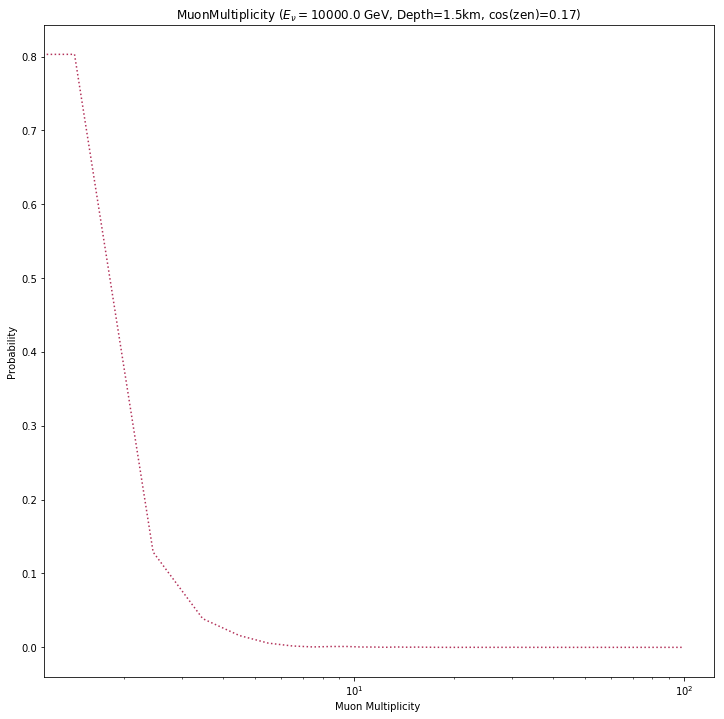

Multiplicities: [1]


<Figure size 432x288 with 0 Axes>

In [29]:
mult_bins=np.linspace(0,100,100+1)
mult_bin_centers = np.sqrt(mult_bins[:-1] * mult_bins[1:])

# Zen_0.17_Depth_1.5
Hist2D=np.load('/data/user/vbasu/SelfVetoArrays/Mult_Zen_0.17_Depth_1.5.npy')
test_index=4
# for test_index in range(len(E_nu_bins)):
test_nu_energy=E_nu_bins[test_index]

# print('Test Energy:',np.around(test_nu_energy,decimals=2),'GeV')
Hist1D=Hist2D[:,test_index]
Hist1D=Hist1D/np.sum(Hist1D)

plt.figure(figsize=(12,12))
plt.plot(mult_bin_centers,Hist1D,linestyle='dotted',label=r'$E_{\nu}$='+str(np.around(test_nu_energy,decimals=2))+'GeV', color=colors[4])
plt.xscale('log')
plt.xlabel('Muon Multiplicity ')
plt.ylabel(r'Probability')
# plt.yscale('log')
plt.title(r'MuonMultiplicity ($E_{\nu}=$' +str(np.around(test_nu_energy,decimals=2))+' GeV, Depth=1.5km, cos(zen)=0.17) ')


plt.show()
plt.clf()

indexarray=np.arange(len(mult_bin_centers))
probarray=Hist1D


sample_indices = np.random.choice(indexarray, 1, p=probarray)
print('Multiplicities:',sample_indices)
# print(np.around(depth_space[np.digitize(1500/1000,depth_space)],decimals=2))

In [15]:
# gridpts=np.logspace(1,7,20+1)
# plotx,ploty=np.meshgrid(np.log10(gridpts),np.log10(gridpts))
# # Zen_0.17_Depth_1.5
# Hist3D=np.load('/data/user/vbasu/SelfVetoArrays/Double_Zen_0.17_Depth_1.5.npy')

# test_index=4
# for test_index in range(len(E_nu_bins)):
#     test_nu_energy=E_nu_bins[test_index]

#     # print('Test Energy:',np.around(test_nu_energy,decimals=2),'GeV')
#     Hist2D=Hist3D[:,:,test_index]
#     Hist2D=Hist2D/np.sum(Hist2D)
#     xv, yv=np.meshgrid(np.log10(mu_bin_centers),np.log10(mu_bin_centers))
#     mask=np.where(Hist2D!=0)

#     try:
#         grid_z1 = griddata((xv[mask],yv[mask]), Hist2D[mask], (plotx,ploty), method='linear')
#     except Exception as e:
#         print (e)
#         print('Test Energy:',np.around(test_nu_energy,decimals=2),'GeV')
#         continue
#     grid_z1=np.nan_to_num(grid_z1)
#     grid_z1=grid_z1/np.sum(grid_z1)

#     plt.figure(figsize=(12,12))
#     im = plt.pcolormesh(10**plotx, 10**ploty,grid_z1.T, cmap='inferno',norm=clrs.LogNorm(vmin=10**(-6), vmax=10))
#     plt.title("Leading v SubleadingMuon Energy", fontsize=20)
#     plt.xscale('log')
#     plt.xlabel('Energy of Leading Muon (GeV)')
#     plt.ylabel(r'Energy of 2nd Muon(GeV)')
#     plt.yscale('log')
#     plt.title(r'$E_{\mu,2}$ vs $E_{\mu,1}$ (Double Muon events) ($E_{\nu}=$' +str(np.around(test_nu_energy,decimals=2))+' GeV, Depth=1.5km, cos(zen)=0.17) ')

#     cbar=plt.colorbar()
#     cbar.set_label('Probability', rotation=270, labelpad=10)
#     plt.savefig("/home/vbasu/scripts/MESE_Studies/SelfVeto/DoubleMuonLinearInterpolation_{:.2f}.png".format(test_nu_energy))
#     plt.xlim(1e1,1e7)
#     plt.ylim(1e1,1e7)
#     plt.show()
#     plt.clf()


In [16]:
# gridpts=np.logspace(1,7,20+1)
# plotx,ploty=np.meshgrid(np.log10(gridpts),np.log10(gridpts))
# # Zen_0.17_Depth_1.5

# test_index=4
# test_nu_energy=E_nu_bins[test_index]

# for zenith in angles_space:
#     coszen=np.around(zenith,decimals=2)
#     Hist3D=np.load('/data/user/vbasu/SelfVetoArrays/Double_Zen_'+str(coszen)+'_Depth_1.5.npy')

#     # print('Test Energy:',np.around(test_nu_energy,decimals=2),'GeV')
#     Hist2D=Hist3D[:,:,test_index]
#     Hist2D=Hist2D/np.sum(Hist2D)
#     del Hist3D
#     xv, yv=np.meshgrid(np.log10(mu_bin_centers),np.log10(mu_bin_centers))
#     mask=np.where(Hist2D!=0)

#     try:
#         grid_z1 = griddata((xv[mask],yv[mask]), Hist2D[mask], (plotx,ploty), method='linear')
#     except Exception as e:
#         print (e)
#         print('Test Energy:',np.around(test_nu_energy,decimals=2),'GeV')
#         continue
#     grid_z1=np.nan_to_num(grid_z1)
#     grid_z1=grid_z1/np.sum(grid_z1)

#     plt.figure(figsize=(12,12))
#     im = plt.pcolormesh(10**plotx, 10**ploty,grid_z1.T, cmap='inferno',norm=clrs.LogNorm(vmin=10**(-6), vmax=10))
#     plt.title("Leading v SubleadingMuon Energy", fontsize=20)
#     plt.xscale('log')
#     plt.xlabel('Energy of Leading Muon (GeV)')
#     plt.ylabel(r'Energy of 2nd Muon(GeV)')
#     plt.yscale('log')
#     plt.title(r'$E_{\mu,2}$ vs $E_{\mu,1}$ (Double Muon events) ($E_{\nu}=$' +str(np.around(test_nu_energy,decimals=2))+' GeV, Depth=1.5km, cos(zen)=' +str(np.around(zenith,decimals=2)))

#     cbar=plt.colorbar()
#     cbar.set_label('Probability', rotation=270, labelpad=10)
#     plt.savefig("/home/vbasu/scripts/MESE_Studies/SelfVeto/DoubleMuonLinearInterpolation_Zenith_{:.2f}.png".format(zenith))
#     plt.xlim(1e1,1e7)
#     plt.ylim(1e1,1e7)
#     plt.show()
#     plt.clf()


In [17]:
# gridpts=np.logspace(1,7,20+1)
# plotx,ploty=np.meshgrid(np.log10(gridpts),np.log10(gridpts))
# # Zen_0.17_Depth_1.5

# test_index=4
# test_nu_energy=E_nu_bins[test_index]

# for depth in depth_space:
#     deep=np.around(depth,decimals=2)
#     Hist3D=np.load('/data/user/vbasu/SelfVetoArrays/Double_Zen_0.17_Depth_'+str(deep)+'.npy')

#     # print('Test Energy:',np.around(test_nu_energy,decimals=2),'GeV')
#     Hist2D=Hist3D[:,:,test_index]
#     Hist2D=Hist2D/np.sum(Hist2D)
#     del Hist3D
#     xv, yv=np.meshgrid(np.log10(mu_bin_centers),np.log10(mu_bin_centers))
#     mask=np.where(Hist2D!=0)

#     try:
#         grid_z1 = griddata((xv[mask],yv[mask]), Hist2D[mask], (plotx,ploty), method='linear')
#     except Exception as e:
#         print (e)
#         print('Test Energy:',np.around(test_nu_energy,decimals=2),'GeV')
#         continue
#     grid_z1=np.nan_to_num(grid_z1)
#     grid_z1=grid_z1/np.sum(grid_z1)

#     plt.figure(figsize=(12,12))
#     im = plt.pcolormesh(10**plotx, 10**ploty,grid_z1.T, cmap='inferno',norm=clrs.LogNorm(vmin=10**(-6), vmax=10))
#     plt.title("Leading v SubleadingMuon Energy", fontsize=20)
#     plt.xscale('log')
#     plt.xlabel('Energy of Leading Muon (GeV)')
#     plt.ylabel(r'Energy of 2nd Muon(GeV)')
#     plt.yscale('log')
#     plt.title(r'$E_{\mu,2}$ vs $E_{\mu,1}$ (Double Muon events) ($E_{\nu}=$' +str(np.around(test_nu_energy,decimals=2))+' GeV, Depth='+str(np.around(depth,decimals=2))+'km, cos(zen)=0.17' )

#     cbar=plt.colorbar()
#     cbar.set_label('Probability', rotation=270, labelpad=10)
#     plt.savefig("/home/vbasu/scripts/MESE_Studies/SelfVeto/DoubleMuonLinearInterpolation_Depth_{:.2f}.png".format(depth))
#     plt.xlim(1e1,1e7)
#     plt.ylim(1e1,1e7)
#     plt.show()
#     plt.clf()
